
## Northern Trust Project-






**Firstly we import all the important libraries needed for showing graphs and file handling,
we have used popular libraries like pandas and matplotlib.**

In [ ]:
# Import required libraries
import math
from datetime import timedelta
import datetime
import requests
import json
import csv
import pandas as pd
from pandas import Series, DataFrame
from pandas import MultiIndex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

**Then we read our csv file with the help of pd.read_csv function of pandas library, in our csv there was some inconsistent data and to make it uniform and we have split the columns to only print the ISO format of currencies.**

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/Exchange_Rate_Report_2022.csv")  # Replace "your_file.csv" with your actual file path

# Extract only the symbols from the currency column names
columns = df.columns[1:]  # Exclude the first column which is 'Date'
symbols = [col.split('(')[1].split(')')[0].strip() for col in columns]

# Rename the columns with the extracted symbols
df.columns = ['Date'] + symbols

# Save the updated DataFrame to a new CSV file
df.to_csv("updated_currency_data_2022.csv", index=False)


**Following the above step, we have downloaded the updated csv after the heading and read it again for future uses.**

In [ ]:
import pandas as pd

# Load the updated CSV file into a DataFrame
updated_df = pd.read_csv("updated_currency_data_2022.csv")

# Display the first few rows of the DataFrame
print(updated_df.head())


       Date      DZD       AUD    BHD     VEF       BWP     BRL     BND  \
0  3-Jan-12      NaN  0.971440  0.376     NaN       NaN  1.8485  1.2925   
1  4-Jan-12      NaN  0.965904  0.376  4.2893  7.490637  1.8304  1.2874   
2  5-Jan-12      NaN  0.968711  0.376  4.2893  7.530120  1.8432  1.2883   
3  6-Jan-12  76.3243  0.978378  0.376  4.2893  7.530120  1.8416  1.2923   
4  9-Jan-12  76.5183  0.983284  0.376  4.2893  7.530120  1.8442  1.2994   

      CAD     CLP  ...       LKR     SEK     CHF     THB     TTD     TND  \
0  1.0090  518.20  ...  113.8998     NaN  0.9334     NaN     NaN  1.4987   
1  1.0135  514.34  ...  113.9000  6.8152  0.9384  31.463  6.4062  1.4942   
2  1.0197  512.23  ...  113.9000  6.8493  0.9492  31.557  6.3886  1.4951   
3  1.0232  511.80  ...  113.8998     NaN  0.9516  31.637  6.3994  1.5046   
4  1.0272  509.54  ...  113.9000  6.9227  0.9520  31.793  6.3931  1.5145   

      AED       GBP  USD     UYU  
0  3.6725  0.640574    1  19.700  
1  3.6725  0.641190   

In [ ]:
!unzip /content/Updated.zip

Archive:  /content/Updated.zip
  inflating: Updated/updated_currency_data_2012.csv  
  inflating: Updated/updated_currency_data_2013.csv  
  inflating: Updated/updated_currency_data_2014.csv  
  inflating: Updated/updated_currency_data_2015.csv  
  inflating: Updated/updated_currency_data_2016.csv  
  inflating: Updated/updated_currency_data_2017.csv  
  inflating: Updated/updated_currency_data_2018.csv  
  inflating: Updated/updated_currency_data_2019.csv  
  inflating: Updated/updated_currency_data_2020.csv  
  inflating: Updated/updated_currency_data_2021.csv  
  inflating: Updated/updated_currency_data_2022.csv  


**Below we have combined the csv files of all 10 years to form a single csv file with the help of the os.path library that provides a platform-independent way of working with file paths. Then we have created a new empty dataframe and in a loop we have started concatenated all the datasets of previous years.**

In [ ]:
import os
import pandas as pd

# Specify the directory where your CSV files are located
directory_path = "/content/Updated"

# List all CSV files in the specified directory
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Iterate through each CSV file and concatenate the data
for file_name in csv_files:
    # Create the file path
    file_path = os.path.join(directory_path, file_name)

    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Concatenate the DataFrame to the existing data
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv("combined_data.csv", index=False)


**After we have combined the files we have downladed the combined file.**

In [ ]:
from google.colab import files

# Download the concatenated file
files.download("combined_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**After the above step, we read the combined file and sort the file according to dates, making it easier to track weekly, monthly and years changes.**

In [ ]:
import pandas as pd

# Load your CSV file into a DataFrame
df = pd.read_csv("combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df_sorted = df.sort_values(by='Date')

# Save the sorted DataFrame to a new CSV file
df_sorted.to_csv("sorted_combined_data.csv", index=False)


**Similarly we download the sorted file now.**

In [ ]:
from google.colab import files

# Download the new CSV file
files.download("sorted_combined_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Testing out the first graph on the combined dataframe of all currencies.**

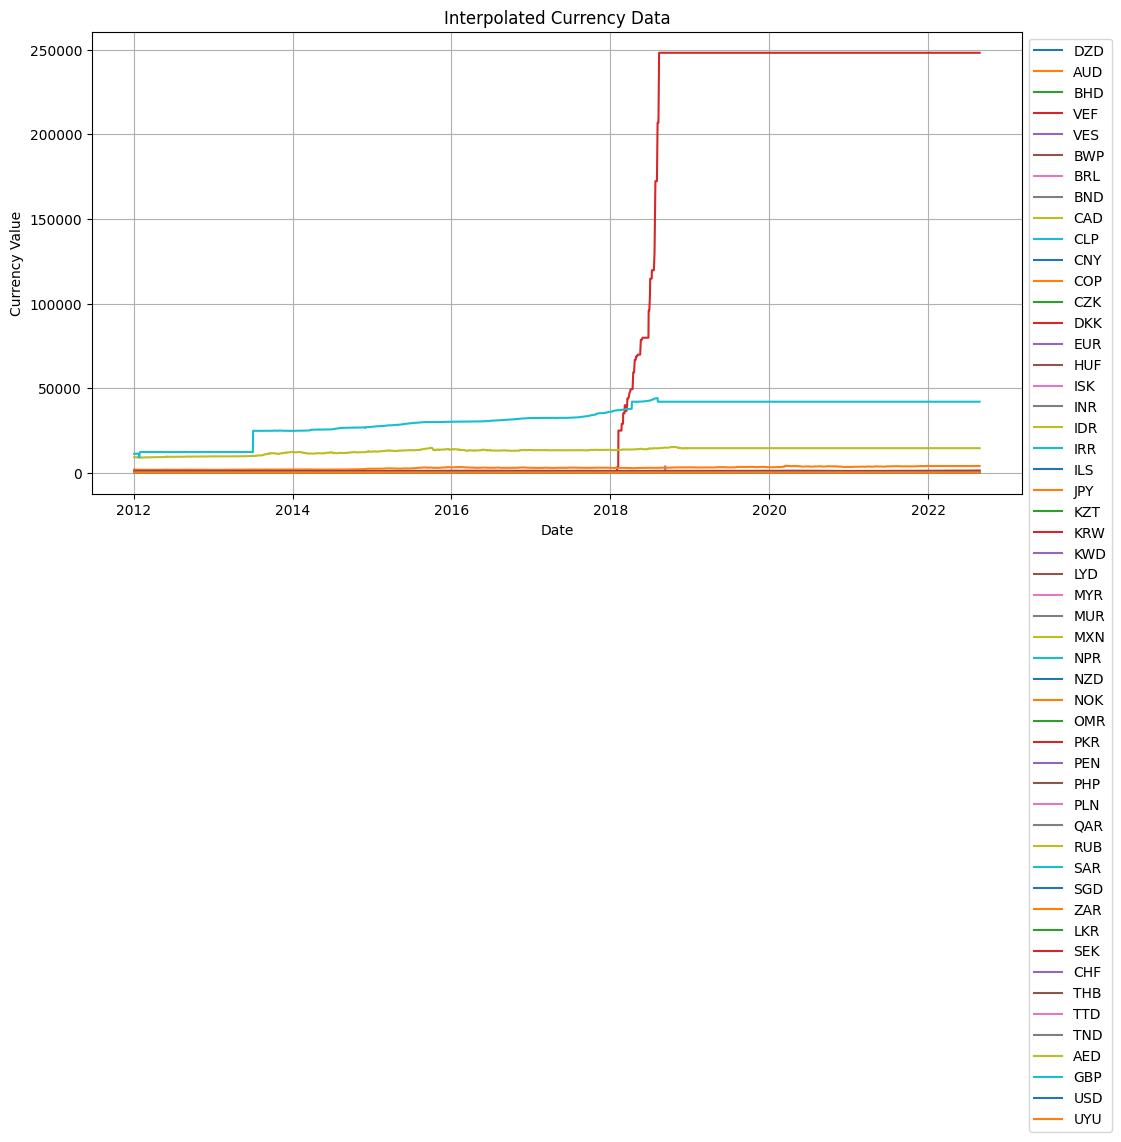

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Interpolate missing values using linear interpolation
df_interpolated = df.interpolate(method='linear')

# Plot the data
plt.figure(figsize=(12, 6))
for column in df_interpolated.columns:
    plt.plot(df_interpolated.index, df_interpolated[column], label=column)

plt.title('Interpolated Currency Data')
plt.xlabel('Date')
plt.ylabel('Currency Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


**Plotting graph for overall change for a currency.We have also shown the min and max value of the respective currency.**

10 YEARS

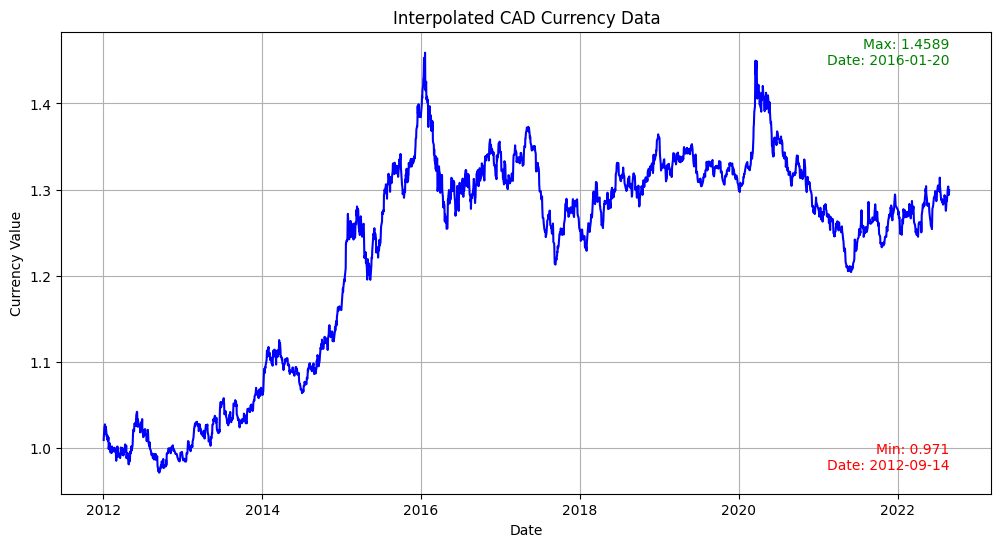

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select the 'CAD' column
cad_data = df['CAD']

# Interpolate missing values using linear interpolation
cad_data_interpolated = cad_data.interpolate(method='linear')

# Plot the data for 'CAD'
plt.figure(figsize=(12, 6))
plt.plot(cad_data_interpolated.index, cad_data_interpolated, label='CAD', color='blue')

# Find the maximum and minimum values and their corresponding dates
max_value = cad_data_interpolated.max()
min_value = cad_data_interpolated.min()
date_of_max = cad_data_interpolated.idxmax()
date_of_min = cad_data_interpolated.idxmin()

# Add annotation for maximum value at the middle right side of the graph
plt.text(df.index[-1], min_value, f'Min: {min_value}\nDate: {date_of_min.strftime("%Y-%m-%d")}', ha='right', va='bottom', color='red')

# Add annotation for minimum value just above the previous annotation
plt.text(df.index[-1], max_value, f'Max: {max_value}\nDate: {date_of_max.strftime("%Y-%m-%d")}', ha='right', va='center', color='green')

plt.title('Interpolated CAD Currency Data')
plt.xlabel('Date')
plt.ylabel('Currency Value')

plt.grid(True)
plt.show()


**Plotting graph for weekly change for a currency.**

WEEK

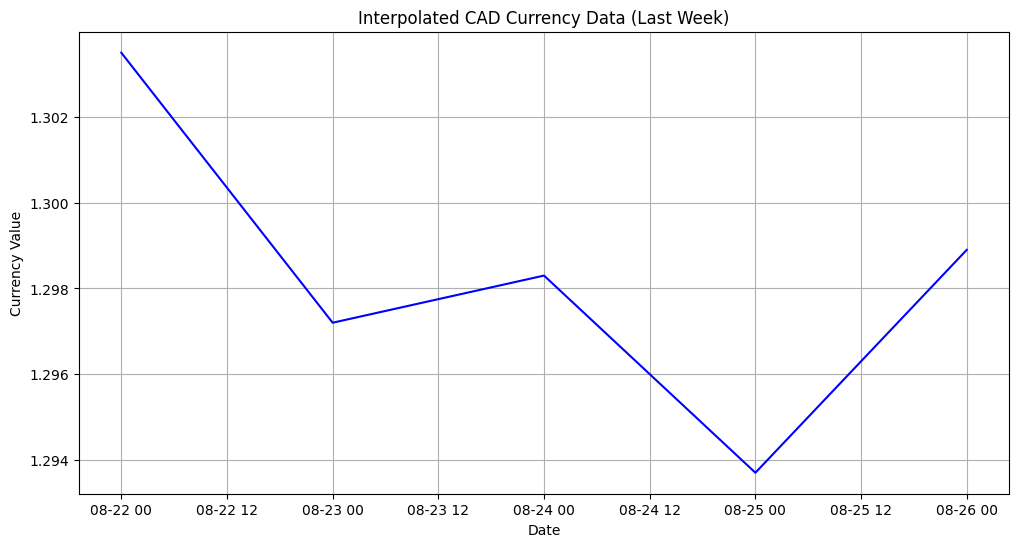

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select the 'CAD' column
cad_data = df['CAD']

# Interpolate missing values using linear interpolation
cad_data_interpolated = cad_data.interpolate(method='linear')

# Filter data for the last week
last_week_data = cad_data_interpolated[df.index > (df.index.max() - pd.DateOffset(weeks=1))]

# Plot the data for 'CAD'
plt.figure(figsize=(12, 6))
plt.plot(last_week_data.index, last_week_data, label='CAD', color='blue')

# Find the maximum and minimum values and their corresponding dates in the last week
max_value = last_week_data.max()
min_value = last_week_data.min()
date_of_max = last_week_data.idxmax()
date_of_min = last_week_data.idxmin()


plt.title('Interpolated CAD Currency Data (Last Week)')
plt.xlabel('Date')
plt.ylabel('Currency Value')
plt.grid(True)
plt.show()


 **Plotting graph for monthly change for a currency.**


MONTH

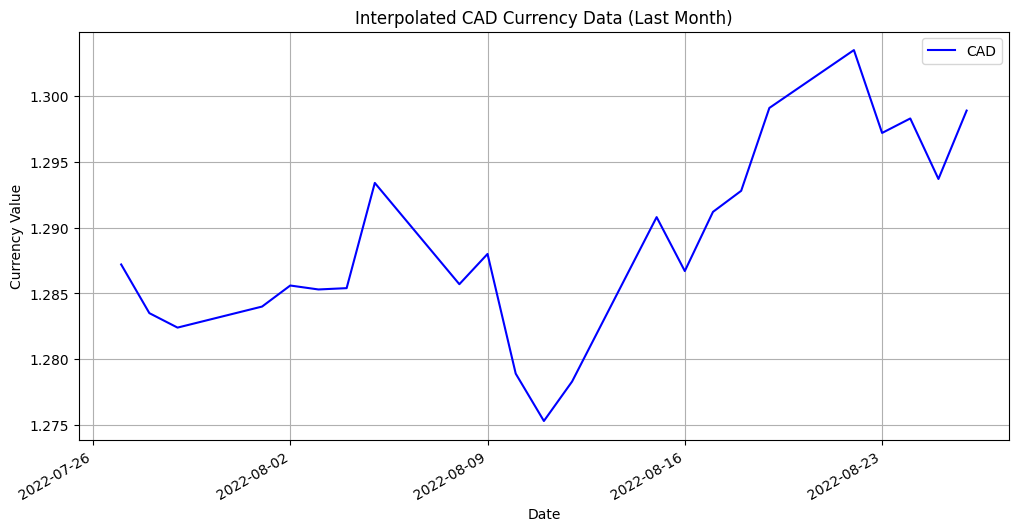

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select the 'CAD' column
cad_data = df['CAD']

# Interpolate missing values using linear interpolation
cad_data_interpolated = cad_data.interpolate(method='linear')

# Filter data for the last month
last_month_data = cad_data_interpolated[df.index > (df.index.max() - pd.DateOffset(months=1))]

# Plot the data for 'CAD' in the last month as a straight line
plt.figure(figsize=(12, 6))
plt.plot(last_month_data.index, last_month_data, label='CAD', color='blue', linestyle='-')

# Style the plot
plt.title('Interpolated CAD Currency Data (Last Month)')
plt.xlabel('Date')
plt.ylabel('Currency Value')
plt.legend()
plt.grid(True)

# Format x-axis date labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()



**Plotting graph for quarterly change for a currency.**

QUARTERLY

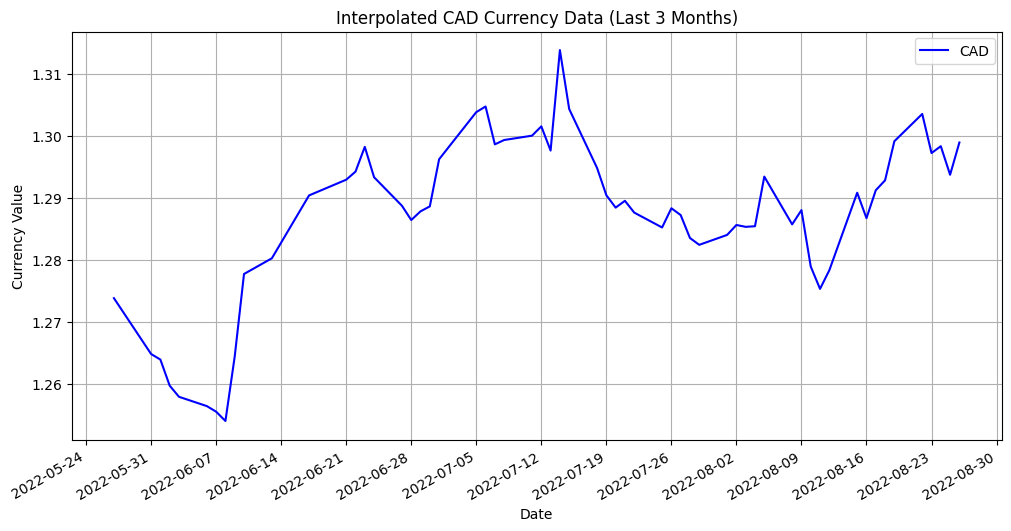

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select the 'CAD' column
cad_data = df['CAD']

# Interpolate missing values using linear interpolation
cad_data_interpolated = cad_data.interpolate(method='linear')

# Filter data for the last 3 months
last_3_months_data = cad_data_interpolated[df.index > (df.index.max() - pd.DateOffset(months=3))]

# Plot the data for 'CAD' in the last 3 months as a straight line
plt.figure(figsize=(12, 6))
plt.plot(last_3_months_data.index, last_3_months_data, label='CAD', color='blue', linestyle='-')

# Style the plot
plt.title('Interpolated CAD Currency Data (Last 3 Months)')
plt.xlabel('Date')
plt.ylabel('Currency Value')
plt.legend()
plt.grid(True)

# Format x-axis date labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()


**Plotting graph for annual change for a currency.**

ANNUAL

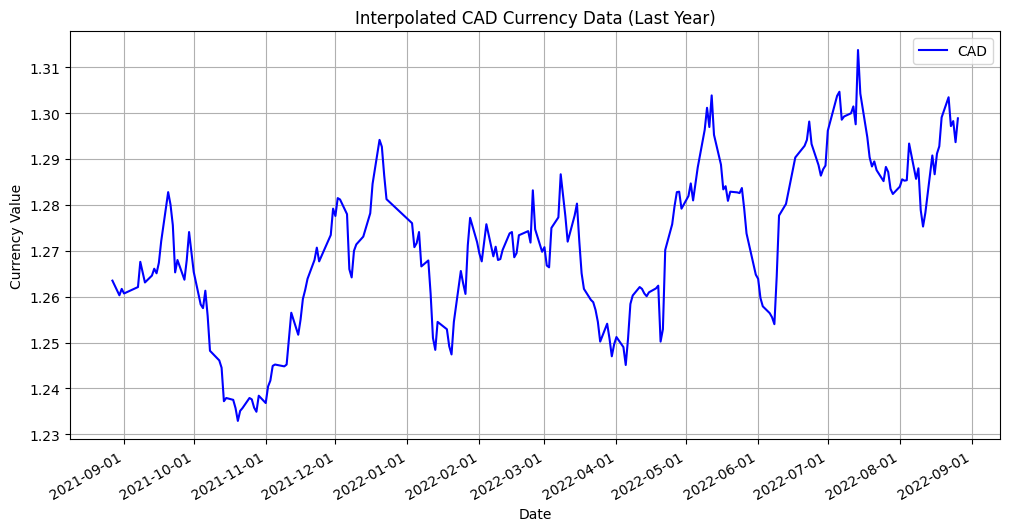

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Select the 'CAD' column
cad_data = df['CAD']

# Interpolate missing values using linear interpolation
cad_data_interpolated = cad_data.interpolate(method='linear')

# Filter data for the last year
last_year_data = cad_data_interpolated[df.index > (df.index.max() - pd.DateOffset(years=1))]

# Plot the data for 'CAD' in the last year as a straight line
plt.figure(figsize=(12, 6))
plt.plot(last_year_data.index, last_year_data, label='CAD', color='blue', linestyle='-')

# Style the plot
plt.title('Interpolated CAD Currency Data (Last Year)')
plt.xlabel('Date')
plt.ylabel('Currency Value')
plt.legend()
plt.grid(True)

# Format x-axis date labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()


**Here we have calculated exchange rates for currencies with respect to USD.**

In [ ]:
import pandas as pd

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Function to get the exchange rate for a given currency code
def get_exchange_rate(currency_code):
    try:
        # Get the last available rates
        last_row = df.tail(1)
        exchange_rate = last_row[currency_code].values[0]
        return exchange_rate
    except KeyError:
        return None

# Input the currency code
currency_code = input("Enter the currency code (e.g., USD, EUR, INR): ").upper()

# Get the exchange rate
exchange_rate = get_exchange_rate(currency_code)

# Display the result
if exchange_rate is not None:
    print(f"The exchange rate for {currency_code} is: {exchange_rate}")
else:
    print(f"Currency code {currency_code} not found in the CSV file.")


Enter the currency code (e.g., USD, EUR, INR): BRL
The exchange rate for BRL is: 5.0897


In [ ]:
import pandas as pd

# Load your CSV file into a DataFrame
df = pd.read_csv("sorted_combined_data.csv")  # Replace with your actual file path

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Function to get the exchange rate for a given currency code
def get_exchange_rate(currency_code):
    try:
        # Get the last available rates
        last_row = df.tail(1)
        exchange_rate = last_row[currency_code].values[0]
        return exchange_rate
    except KeyError:
        return None

# Input the currency code
currency_code = input("Enter the target currency code (e.g., USD, EUR, INR): ").upper()

# Input the amount in USD
try:
    amount_in_usd = float(input("Enter the amount in USD: "))
except ValueError:
    print("Invalid input. Please enter a valid numerical amount.")
    exit()

# Get the exchange rate
exchange_rate = get_exchange_rate(currency_code)

# Display the result
if exchange_rate is not None:
    converted_amount = amount_in_usd * exchange_rate
    print(f"{amount_in_usd} USD is equivalent to {converted_amount} {currency_code}")
else:
    print(f"Currency code {currency_code} not found in the CSV file.")



Enter the target currency code (e.g., USD, EUR, INR): INR
Enter the amount in USD: 10
10.0 USD is equivalent to 799.097 INR
